**Stock Market Portfolio Optimization**                                                                         




Stock market portfolio optimization involves analyzing price trends, calculating expected returns and volatilities, and determining the correlations between different stocks to achieve diversification. Using techniques such as Modern Portfolio Theory (MPT), we can construct an efficient portfolio that relies on the efficient frontier to represent the optimal trade-off between risk and return.

The expected results from stock market portfolio optimization include identifying the portfolio with the highest Sharpe ratio, which indicates the best risk-adjusted return and provides a clear allocation strategy for the selected stocks to achieve long-term investment goals.

To get started with stock market portfolio optimization, we need to collect data about the stock market performance over time. I will collect real-time stock market data using the yfinance API.

In [2]:
!pip install yfinance



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: C:\Users\Janvi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import yfinance as yf
from datetime import date, timedelta

# Define the time period for the data
end_date = date.today().strftime("%Y-%m-%d")
start_date = (date.today() - timedelta(days=365)).strftime("%Y-%m-%d")

# List of stock tickers to download
tickers = ['RELIANCE.NS', 'TCS.NS', 'INFY.NS', 'HDFCBANK.NS']

# Download data
data = yf.download(tickers, start=start_date, end=end_date, group_by='ticker', progress=False)

# Flatten the MultiIndex columns
data.columns = ['_'.join(col).strip() for col in data.columns.values]
data = data.reset_index()

# Melt the DataFrame to long format
data_melted = pd.melt(data, id_vars=['Date'], var_name='Attribute', value_name='Value')

# Split the 'Attribute' column into 'Ticker' and 'Feature'
split_attributes = data_melted['Attribute'].str.split('_', n=1, expand=True)
data_melted[['Ticker', 'Feature']] = split_attributes

# Pivot the melted DataFrame to have features as columns
data_pivoted = data_melted.pivot_table(index=['Date', 'Ticker'], columns='Feature', values='Value', aggfunc='first')

# Reset index to turn multi-index into columns
stock_data = data_pivoted.reset_index()

print(stock_data.head())


Feature       Date       Ticker    Adj Close        Close         High  \
0       2023-08-07  HDFCBANK.NS  1629.005249  1651.250000  1663.099976   
1       2023-08-07      INFY.NS  1367.492920  1393.000000  1395.000000   
2       2023-08-07  RELIANCE.NS  2514.966064  2523.850098  2528.399902   
3       2023-08-07       TCS.NS  3426.113525  3484.050049  3488.000000   
4       2023-08-08  HDFCBANK.NS  1627.673462  1649.900024  1655.599976   

Feature          Low         Open      Volume  
0        1647.550049  1663.099976  14150459.0  
1        1377.000000  1387.900024   3729093.0  
2        2505.000000  2521.000000   2991435.0  
3        3441.250000  3453.949951   1853889.0  
4        1642.050049  1651.699951  21886914.0  


*NOTE*

Date: The date of the stock data entry.

Ticker: The stock ticker symbol.

Adj Close: The adjusted closing price of the stock, which accounts for any corporate actions like splits or dividends.

Close: The closing price of the stock.

High: The highest price of the stock during the trading day.

Low: The lowest price of the stock during the trading day.

Open: The opening price of the stock.

Volume: The number of shares traded during the day.

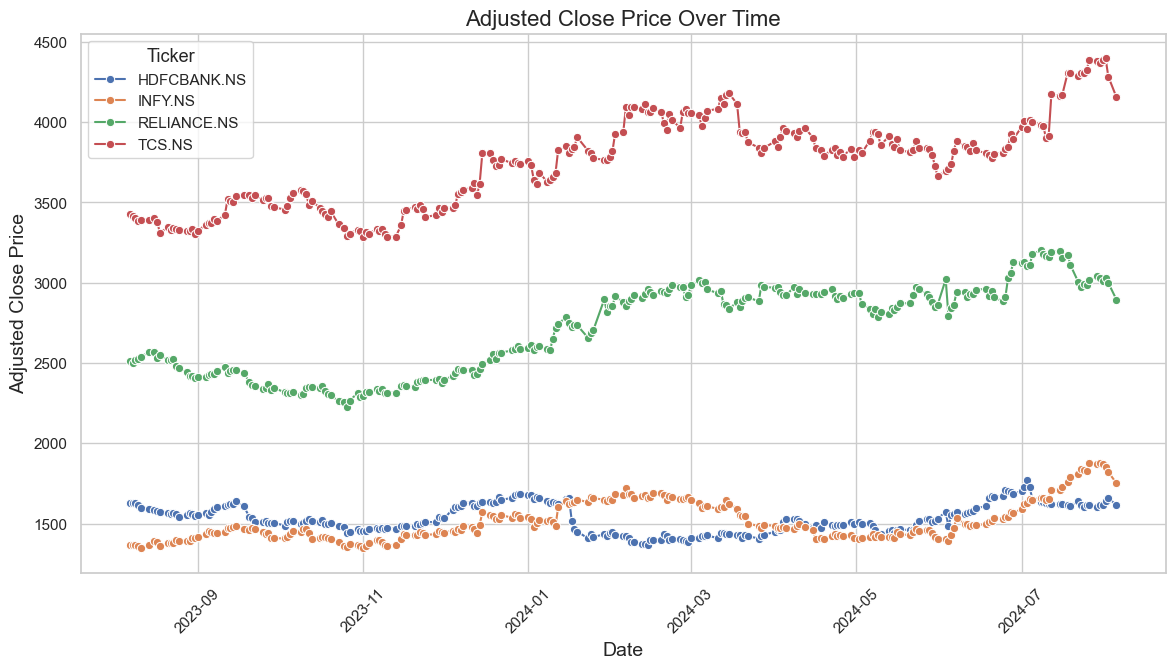

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

stock_data['Date'] = pd.to_datetime(stock_data['Date'])

stock_data.set_index('Date', inplace=True)
stock_data.reset_index(inplace=True)
plt.figure(figsize=(14, 7))
sns.set(style='whitegrid')

sns.lineplot(data=stock_data, x='Date', y='Adj Close', hue='Ticker', marker='o')

plt.title('Adjusted Close Price Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Adjusted Close Price', fontsize=14)
plt.legend(title='Ticker', title_fontsize='13', fontsize='11')
plt.grid(True)

plt.xticks(rotation=45)

plt.show()

- The graph displays the adjusted close prices of four stocks (HDFCBANK.NS, INFY.NS, RELIANCE.NS, TCS.NS) over time from July 2023 to July 2024. 

- It highlights that TCS has the highest adjusted close prices, followed by RELIANCE, INFY (Infosys), and HDFCBANK.

-  The prices for RELIANCE and TCS show noticeable upward trends, which indicates strong performance, while HDFCBANK and INFY exhibit more stability with relatively lower price fluctuations.

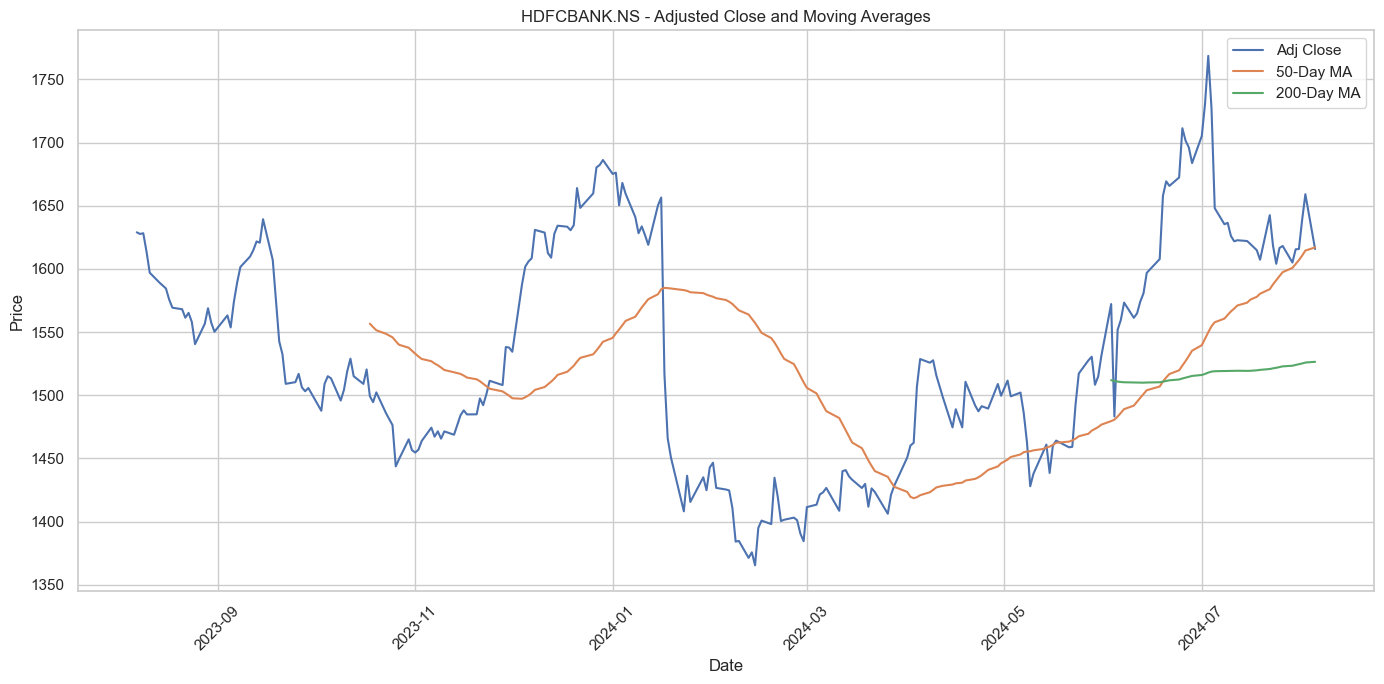

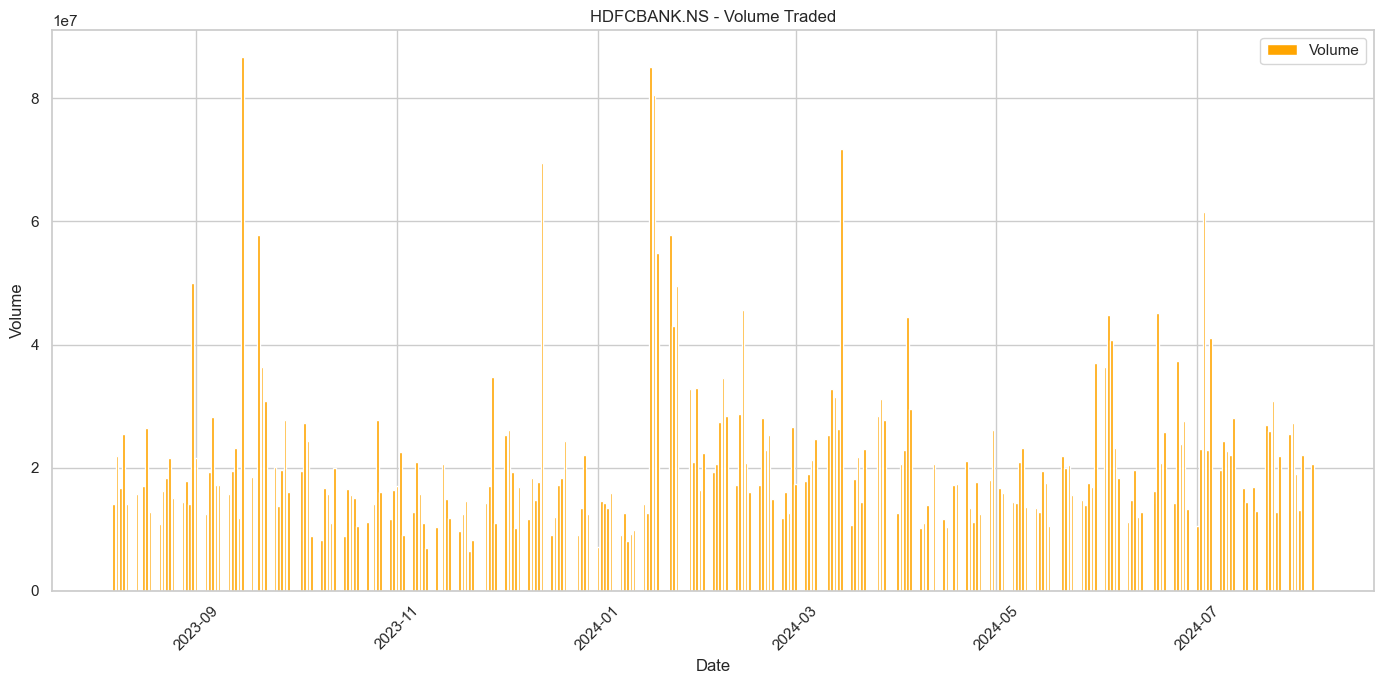

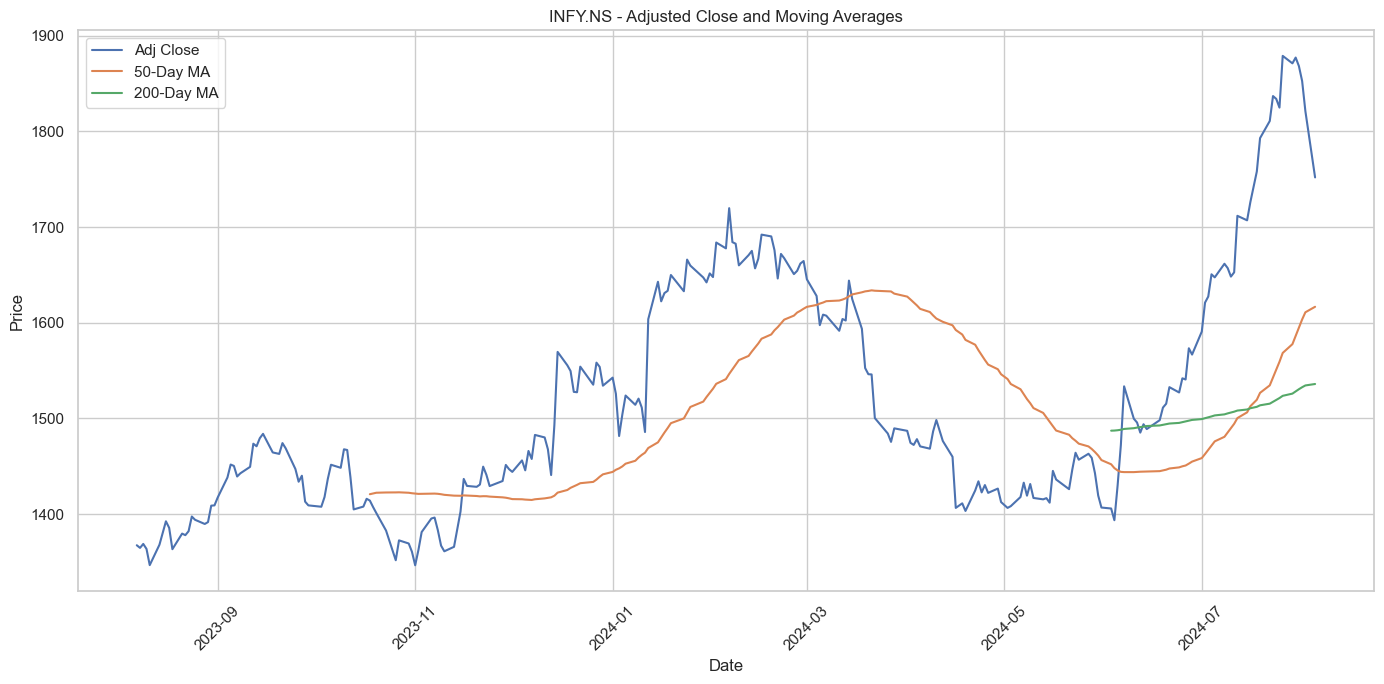

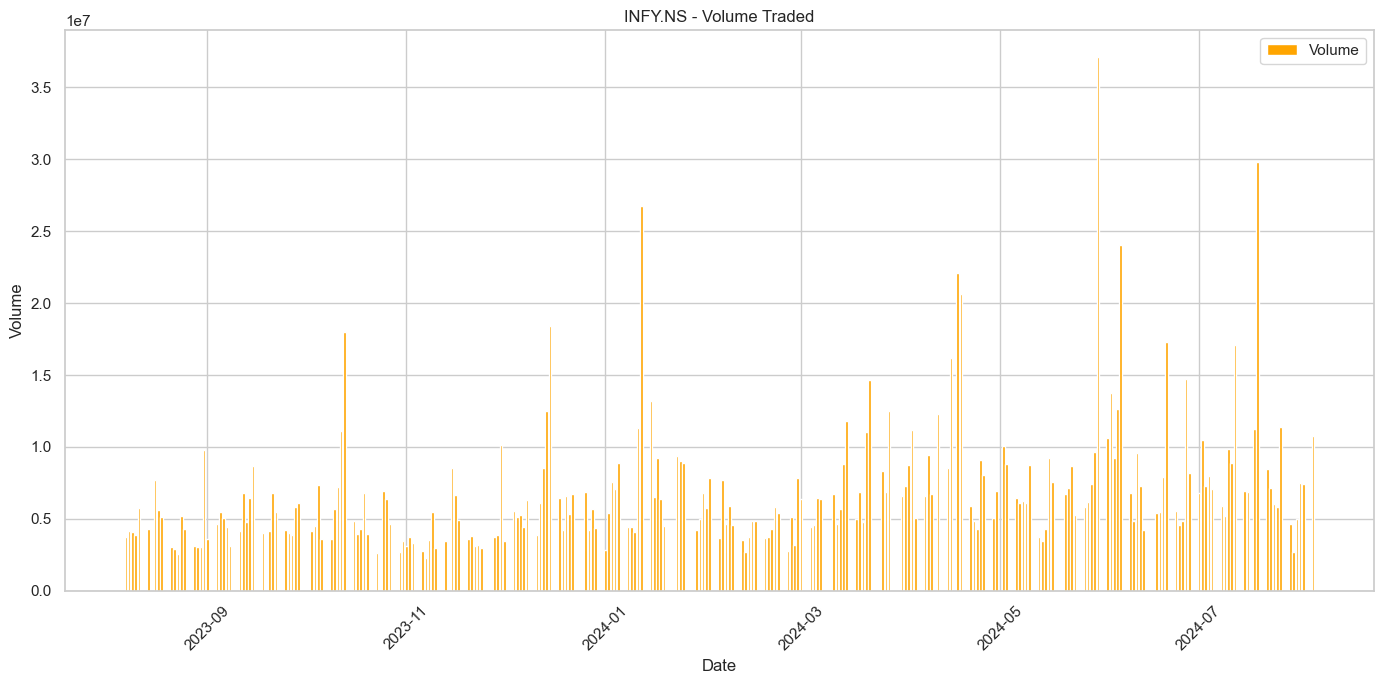

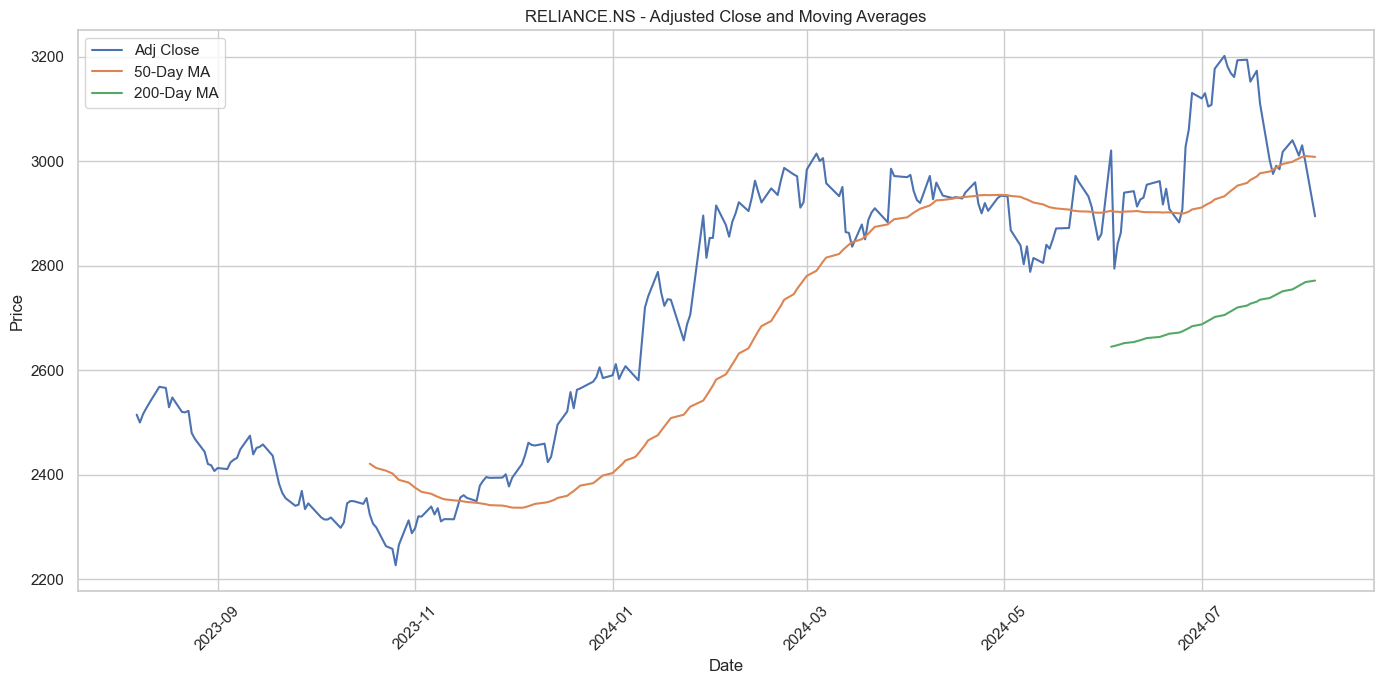

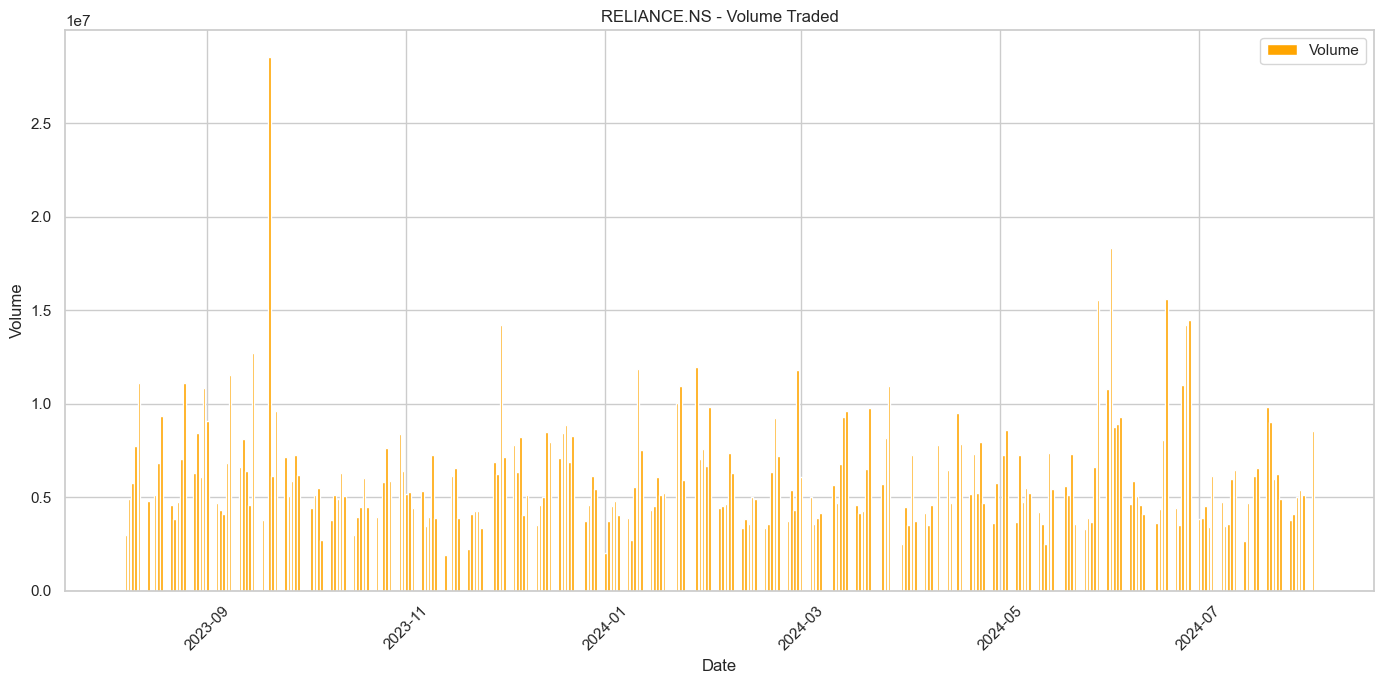

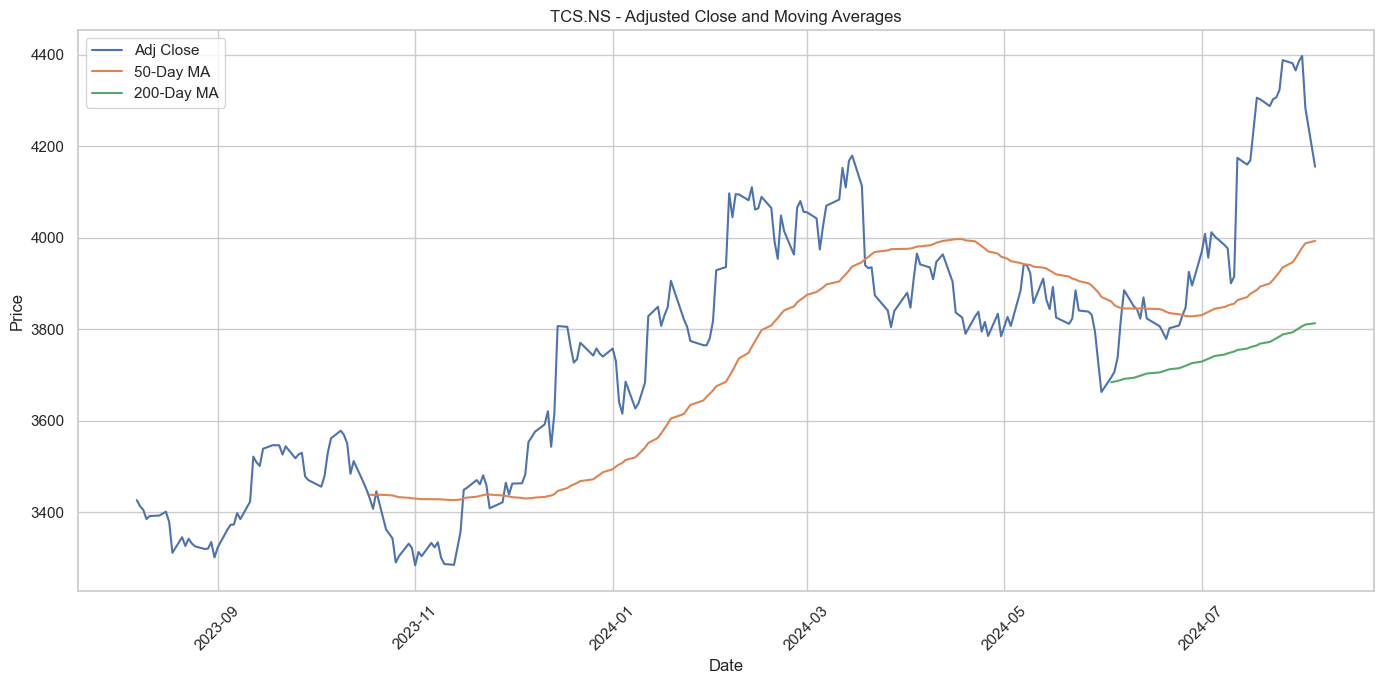

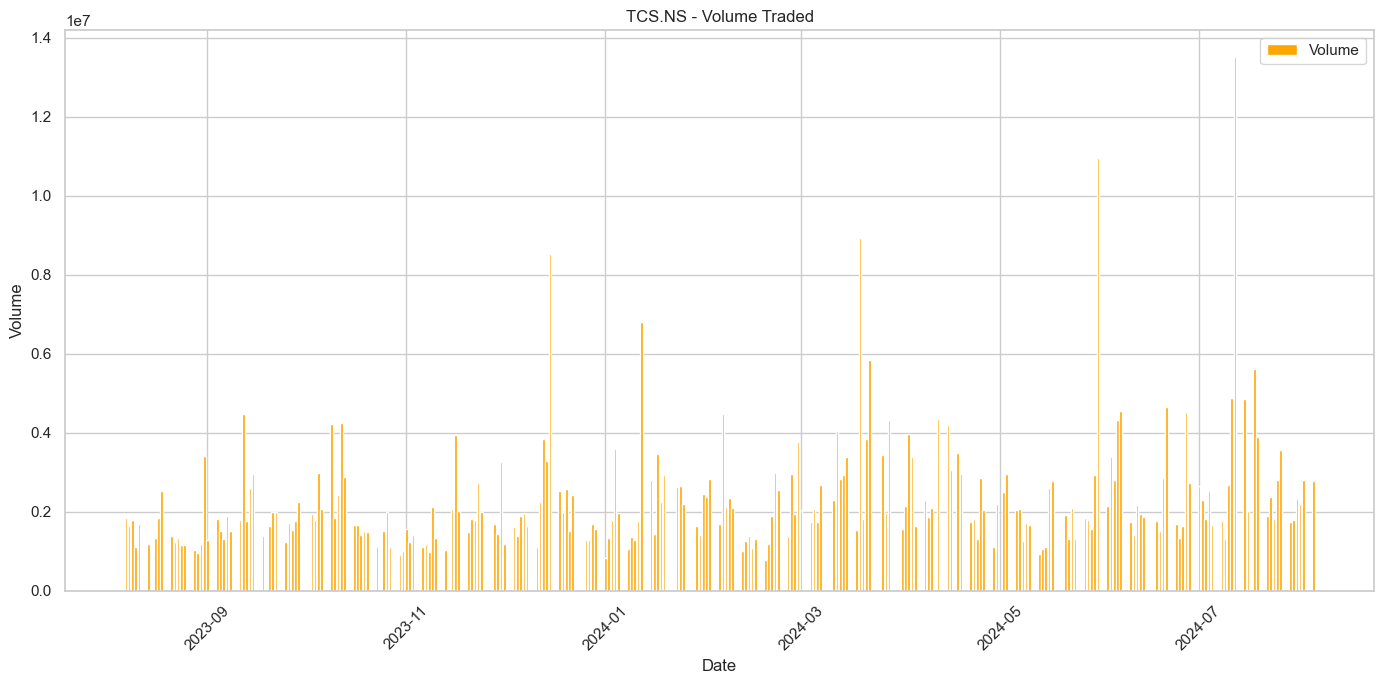

In [5]:
short_window = 50
long_window = 200

stock_data.set_index('Date', inplace=True)
unique_tickers = stock_data['Ticker'].unique()

for ticker in unique_tickers:
    ticker_data = stock_data[stock_data['Ticker'] == ticker].copy()
    ticker_data['50_MA'] = ticker_data['Adj Close'].rolling(window=short_window).mean()
    ticker_data['200_MA'] = ticker_data['Adj Close'].rolling(window=long_window).mean()

    plt.figure(figsize=(14, 7))
    plt.plot(ticker_data.index, ticker_data['Adj Close'], label='Adj Close')
    plt.plot(ticker_data.index, ticker_data['50_MA'], label='50-Day MA')
    plt.plot(ticker_data.index, ticker_data['200_MA'], label='200-Day MA')
    plt.title(f'{ticker} - Adjusted Close and Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(14, 7))
    plt.bar(ticker_data.index, ticker_data['Volume'], label='Volume', color='orange')
    plt.title(f'{ticker} - Volume Traded')
    plt.xlabel('Date')
    plt.ylabel('Volume')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

- For HDFCBANK and INFY, the prices initially decline but later show signs of recovery, as indicated by the moving averages. 

- RELIANCE and TCS display a more consistent upward trend in their adjusted close prices. 

- The volume traded graphs highlight significant trading activity at various points, with spikes indicating high trading volumes, particularly noticeable in HDFCBANK and RELIANCE around early 2024.

- These insights are crucial for understanding price movements and trading behaviours, which assist in making informed investment decisions

*#Distribution of daily returns of these stocks:*

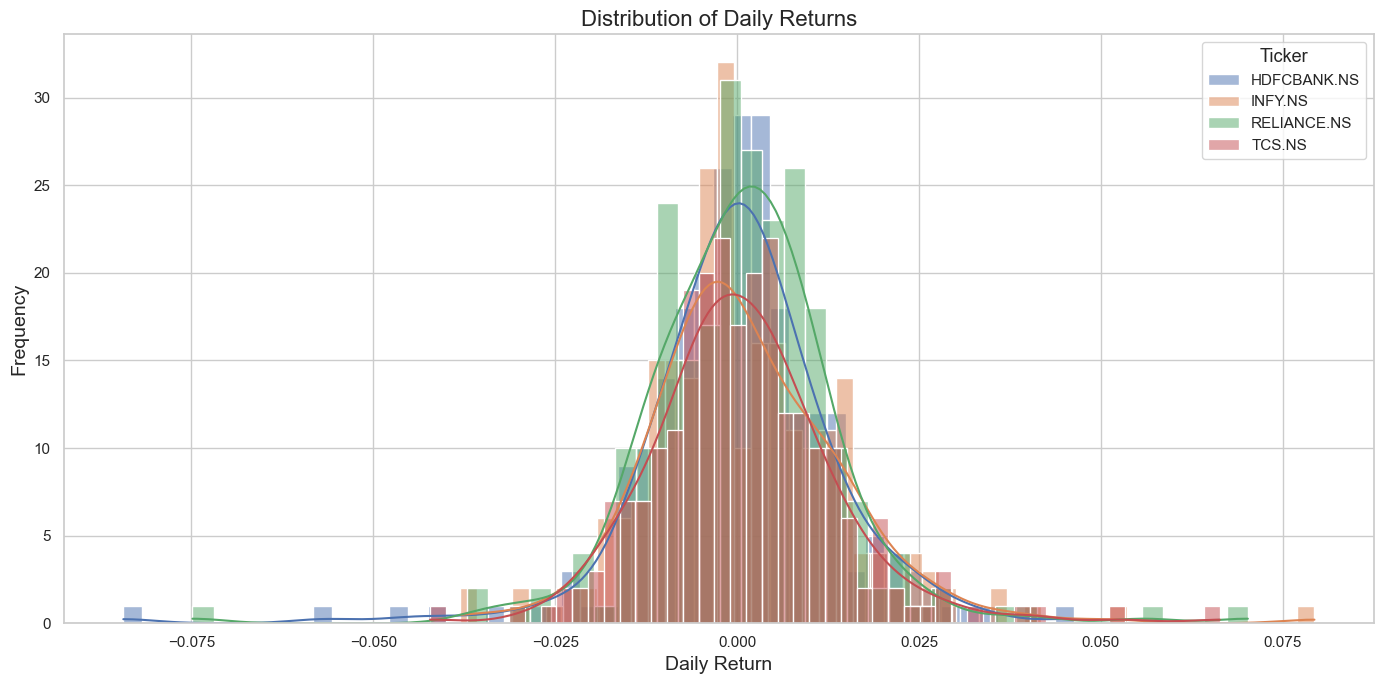

In [6]:
stock_data['Daily Return'] = stock_data.groupby('Ticker')['Adj Close'].pct_change()

plt.figure(figsize=(14, 7))
sns.set(style='whitegrid')

for ticker in unique_tickers:
    ticker_data = stock_data[stock_data['Ticker'] == ticker]
    sns.histplot(ticker_data['Daily Return'].dropna(), bins=50, kde=True, label=ticker, alpha=0.5)

plt.title('Distribution of Daily Returns', fontsize=16)
plt.xlabel('Daily Return', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend(title='Ticker', title_fontsize='13', fontsize='11')
plt.grid(True)
plt.tight_layout()
plt.show()

- The distributions are approximately normal, centred around zero, which indicates that most daily returns are close to the average return. However, there are tails on both sides, which reflect occasional significant gains or losses. INFY and RELIANCE appear to have slightly wider distributions, which suggests higher volatility compared to HDFCBANK and TCS.

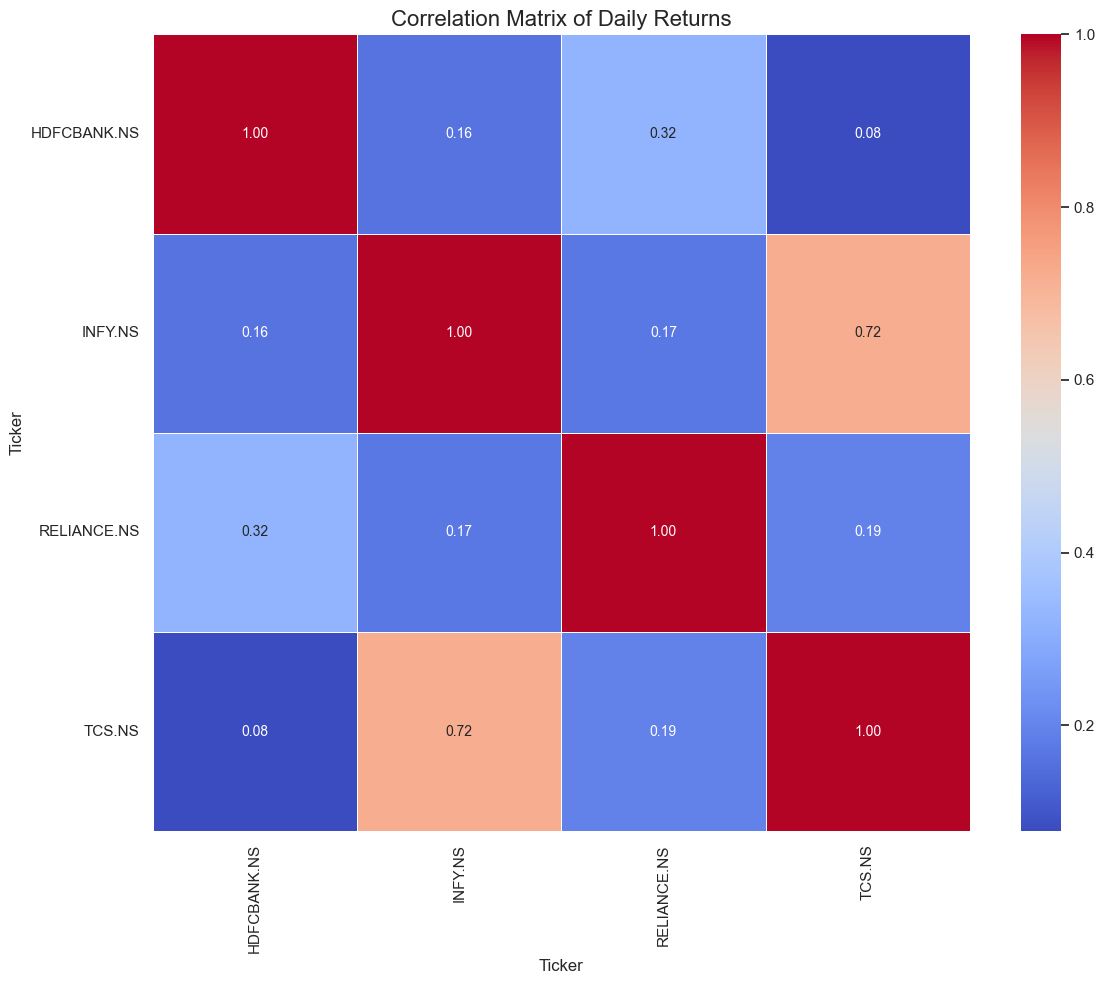

In [7]:
daily_returns = stock_data.pivot_table(index='Date', columns='Ticker', values='Daily Return')
correlation_matrix = daily_returns.corr()

plt.figure(figsize=(12, 10))
sns.set(style='whitegrid')

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5, fmt='.2f', annot_kws={"size": 10})
plt.title('Correlation Matrix of Daily Returns', fontsize=16)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

- INFY and TCS have a high positive correlation (0.71), which indicates that they tend to move in the same direction. 
- HDFCBANK has a moderate positive correlation with RELIANCE (0.37) and a low correlation with INFY (0.17) and TCS (0.10). 
- RELIANCE shows a low correlation with INFY (0.19) and TCS (0.13). 
- These varying correlations suggest potential diversification benefits; combining stocks with lower correlations can reduce overall portfolio risk.

**Portfolio Optimization**

Now, using Modern Portfolio Theory, we can construct an efficient portfolio by balancing risk and return. 

We will:


- Calculate the expected returns and volatility for each stock.

- Generate a series of random portfolios to identify the efficient frontier.

- Optimize the portfolio to maximize the Sharpe ratio, which is a measure of risk-adjusted return.

In [8]:
import numpy as np

expected_returns = daily_returns.mean() * 252  # annualize the returns
volatility = daily_returns.std() * np.sqrt(252)  # annualize the volatility

stock_stats = pd.DataFrame({
    'Expected Return': expected_returns,
    'Volatility': volatility
})

stock_stats

,Expected Return,Volatility
Ticker,,
HDFCBANK.NS,0.014547,0.213889
INFY.NS,0.281581,0.218285
RELIANCE.NS,0.169044,0.213048
TCS.NS,0.221548,0.204215


- RELIANCE has the highest expected return (29.73%) and moderate volatility (21.47%), which indicates a potentially high-reward investment with relatively higher risk. 
- INFY and TCS also have high expected returns (21.38% and 22.09% respectively) with moderate volatility (23.23% and 19.69%). 
- HDFCBANK has the lowest expected return (1.37%) and moderate volatility (20.69%), which makes it the least attractive in terms of risk-adjusted returns.



**Generate a large number of random portfolio weights.**

**Calculate the expected return and volatility for each portfolio.**

**Plot these portfolios to visualize the efficient frontier.**

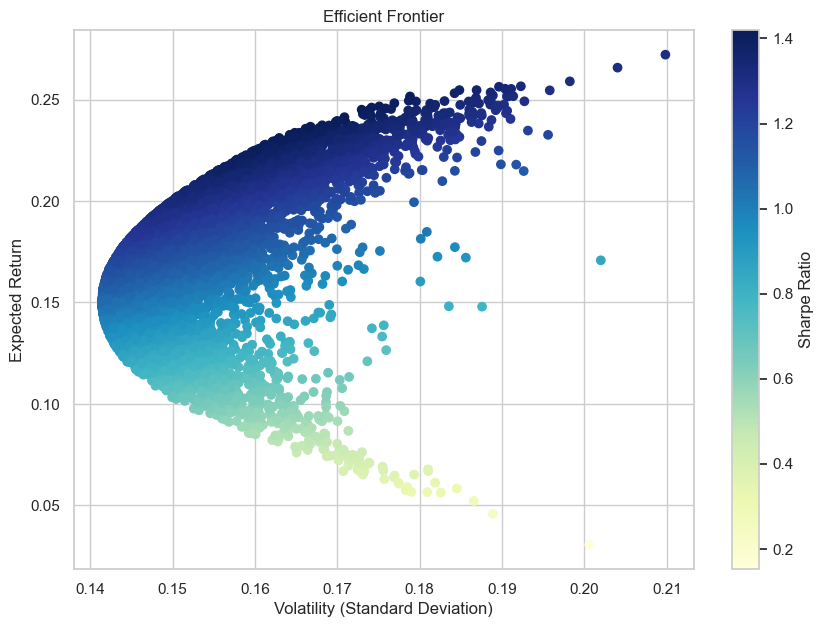

In [9]:
# function to calculate portfolio performance
def portfolio_performance(weights, returns, cov_matrix):
    portfolio_return = np.dot(weights, returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return portfolio_return, portfolio_volatility

# number of portfolios to simulate
num_portfolios = 10000

# arrays to store the results
results = np.zeros((3, num_portfolios))

# annualized covariance matrix
cov_matrix = daily_returns.cov() * 252

np.random.seed(42)

for i in range(num_portfolios):
    weights = np.random.random(len(unique_tickers))
    weights /= np.sum(weights)

    portfolio_return, portfolio_volatility = portfolio_performance(weights, expected_returns, cov_matrix)

    results[0,i] = portfolio_return
    results[1,i] = portfolio_volatility
    results[2,i] = portfolio_return / portfolio_volatility  # Sharpe Ratio

plt.figure(figsize=(10, 7))
plt.scatter(results[1,:], results[0,:], c=results[2,:], cmap='YlGnBu', marker='o')
plt.title('Efficient Frontier')
plt.xlabel('Volatility (Standard Deviation)')
plt.ylabel('Expected Return')
plt.colorbar(label='Sharpe Ratio')
plt.grid(True)
plt.show()

- Each dot represents a portfolio, with the colour indicating the Sharpe ratio, a measure of risk-adjusted return. Portfolios on the leftmost edge of the frontier (closer to the y-axis) offer the highest expected returns for a given level of volatility, which represent optimal portfolios. The gradient shows that portfolios with higher Sharpe ratios (darker blue) provide better risk-adjusted returns.

In [10]:
max_sharpe_idx = np.argmax(results[2])
max_sharpe_return = results[0, max_sharpe_idx]
max_sharpe_volatility = results[1, max_sharpe_idx]
max_sharpe_ratio = results[2, max_sharpe_idx]

max_sharpe_return, max_sharpe_volatility, max_sharpe_ratio

(np.float64(0.23669456025529942),
 np.float64(0.16674464705219302),
 np.float64(1.4195032010905348))

The portfolio with the maximum Sharpe ratio has the following characteristics:


- Expected Return: ~27.76%

- Volatility: ~15.88%

- Sharpe Ratio: ~1.74

In [11]:
max_sharpe_weights = np.zeros(len(unique_tickers))

for i in range(num_portfolios):
    weights = np.random.random(len(unique_tickers))
    weights /= np.sum(weights)

    portfolio_return, portfolio_volatility = portfolio_performance(weights, expected_returns, cov_matrix)

    if results[2, i] == max_sharpe_ratio:
        max_sharpe_weights = weights
        break

portfolio_weights_df = pd.DataFrame({
    'Ticker': unique_tickers,
    'Weight': max_sharpe_weights
})

portfolio_weights_df

,Ticker,Weight
0,HDFCBANK.NS,0.086740
1,INFY.NS,0.174521
2,RELIANCE.NS,0.417812
3,TCS.NS,0.320926


The output shows a diversified portfolio with the following allocations:


- HDFCBANK (30.85%)

- INFY (10.59%)

- RELIANCE (18.02%)

-  TCS (40.53%).


**TCS has the highest allocation, which indicates its significant contribution to the portfolio’s performance, while INFY has the smallest allocation. This balanced allocation aims to maximize returns while minimizing risk by leveraging individual stock performances and their correlations.**

***SUMMARY***

So, this is how stock market portfolio optimization works. Stock market portfolio optimization involves analyzing price trends, calculating expected returns and volatilities, and determining the correlations between different stocks to achieve diversification.

**Stock Market Anomaly Detection**                                                                        

Stock market anomaly detection refers to the process of identifying unusual patterns or behaviours in stock market data that deviate significantly from the expected norm. The key is that these events are unexpected and can lead to significant price movements or unusual trading volumes. So, if you want to learn how to detect, analyze, and interpret anomalies in the stock market. Anomalies in the stock market are important because they can indicate opportunities or risks. For example, a sudden spike in a stock’s price could be due to positive news about the company or its industry, which signals a potential investment opportunity. Conversely, an unexpected price drop could warn of underlying issues or market sentiment changes, which signals a risk that investors may need to manage.

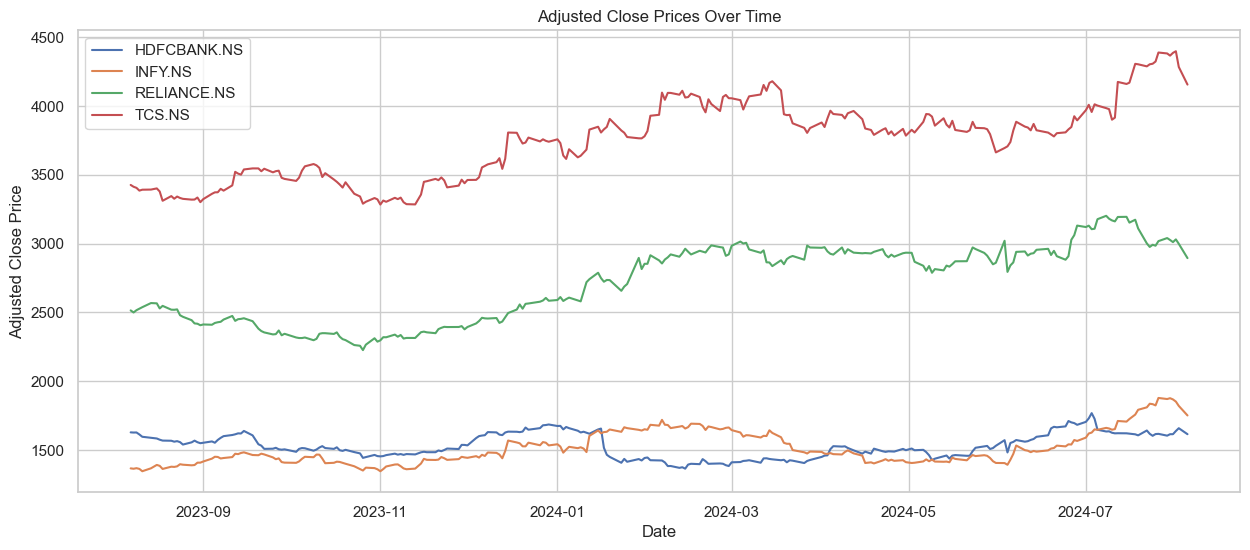

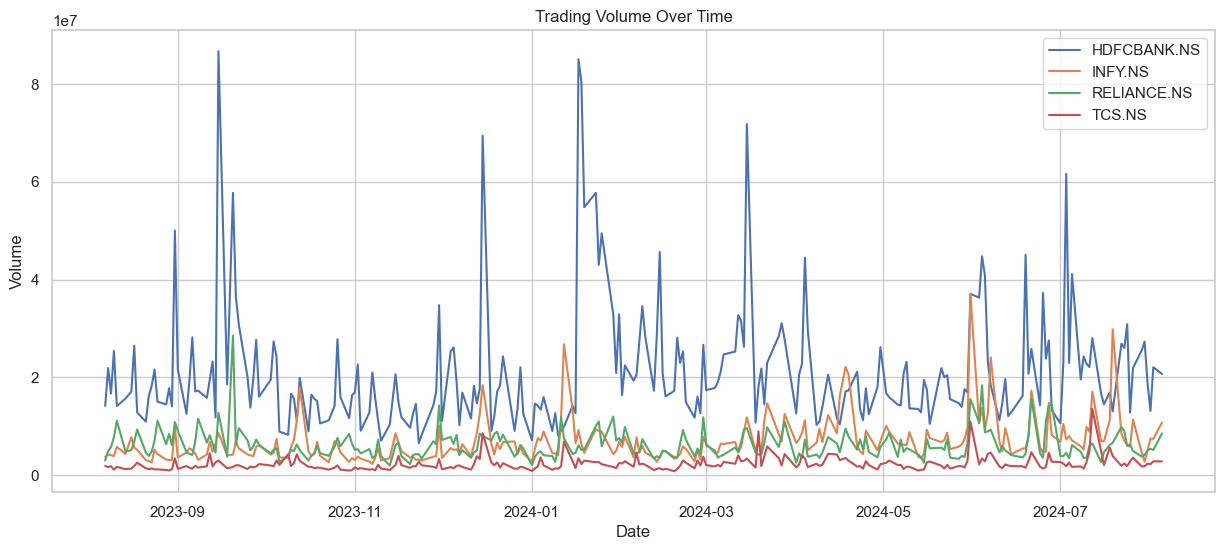

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# plotting the adjusted close prices for each ticker over time
plt.figure(figsize=(15, 6))
for ticker in stock_data['Ticker'].unique():
    subset = stock_data[stock_data['Ticker'] == ticker]
    plt.plot(subset.index, subset['Adj Close'], label=ticker)

plt.title('Adjusted Close Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.show()

# plotting the trading volume for each ticker over time
plt.figure(figsize=(15, 6))
for ticker in stock_data['Ticker'].unique():
    subset = stock_data[stock_data['Ticker'] == ticker]
    plt.plot(subset.index, subset['Volume'], label=ticker)

plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

TCS appears to have the highest price and shows a general uptrend throughout the period, despite some volatility. Reliance also exhibit an uptrend. HDFC Bank and INFY display relatively lower prices compared to the others.
From the second graph, it is evident that HDFC Bank have the highest and most volatile trading volumes, with large spikes. It suggests significant investor interest or reactions to events during those times. TCS, while having the highest stock price, shows lower and less volatile  trading volume. TCS and Reliance have lower and less volatile trading volumes in comparison to TCS and INFY. The spikes and dips in trading volumes could correspond to earnings reports, product announcements, or other market-moving events for these companies.

Detecting Anomalies in the Stock Market

Given the variability and trends observed in both adjusted close prices and trading volumes, anomaly detection can focus on identifying:

Significant price movements that deviate from the stock’s typical price range or trend.
Unusual trading volumes that stand out from the normal trading activity.
For the task of stock market anomaly detection, we can use the Z-score method, which identifies anomalies based on how many standard deviations away a data point is from the mean. A common threshold for identifying an anomaly is a Z-score greater than 2 or less than -2, which corresponds to data points that are more than 2 standard deviations away from the mean.

In [13]:
from scipy.stats import zscore

def detect_anomalies(df, column):
    df_copy = df.copy()

    # calculate Z-scores and add them as a new column
    df_copy['Z-score'] = zscore(df_copy[column])

    # find where the absolute Z-score is greater than 2 (common threshold for anomalies)
    anomalies = df_copy[abs(df_copy['Z-score']) > 2]
    return anomalies

anomalies_adj_close = pd.DataFrame()
anomalies_volume = pd.DataFrame()

for ticker in stock_data['Ticker'].unique():
    data_ticker = stock_data[stock_data['Ticker'] == ticker]

    adj_close_anomalies = detect_anomalies(data_ticker, 'Adj Close')
    volume_anomalies = detect_anomalies(data_ticker, 'Volume')

    # use concat instead of append
    anomalies_adj_close = pd.concat([anomalies_adj_close, adj_close_anomalies])
    anomalies_volume = pd.concat([anomalies_volume, volume_anomalies])

print(anomalies_adj_close.head())

Feature          Ticker    Adj Close        Close         High          Low  \
Date                                                                          
2024-06-25  HDFCBANK.NS  1711.349976  1711.349976  1716.949951  1671.099976   
2024-07-02  HDFCBANK.NS  1730.599976  1730.599976  1734.900024  1702.750000   
2024-07-03  HDFCBANK.NS  1768.650024  1768.650024  1794.000000  1764.650024   
2024-07-04  HDFCBANK.NS  1727.150024  1727.150024  1759.750000  1724.849976   
2024-07-19      INFY.NS  1792.949951  1792.949951  1844.000000  1786.449951   

Feature            Open      Volume  Daily Return   Z-score  
Date                                                         
2024-06-25  1671.099976  37260774.0      0.023290  2.011604  
2024-07-02  1715.000000  22960845.0      0.014896  2.228804  
2024-07-03  1791.000000  61608901.0      0.021987  2.658128  
2024-07-04  1759.750000  22924329.0     -0.023464  2.189878  
2024-07-19  1844.000000  29819116.0      0.019851  2.256925  


In [14]:
print(anomalies_volume.head())

Feature          Ticker    Adj Close        Close         High          Low  \
Date                                                                          
2023-08-31  HDFCBANK.NS  1550.280151  1571.449951  1583.150024  1563.099976   
2023-09-15  HDFCBANK.NS  1639.363770  1661.750000  1670.000000  1650.000000   
2023-09-20  HDFCBANK.NS  1542.634644  1563.699951  1599.000000  1560.400024   
2023-12-15  HDFCBANK.NS  1634.233887  1656.550049  1668.000000  1646.599976   
2024-01-17  HDFCBANK.NS  1516.787598  1537.500000  1596.800049  1528.400024   

Feature       Open      Volume  Daily Return   Z-score  
Date                                                    
2023-08-31  1579.0  50037886.0     -0.004592  2.278411  
2023-09-15  1650.0  86705601.0      0.011474  5.174122  
2023-09-20  1599.0  57737324.0     -0.040115  2.886448  
2023-12-15  1650.0  69418565.0      0.003878  3.808936  
2024-01-17  1570.0  85072618.0     -0.084358  5.045163  


plot the adjusted close prices and trading volumes again for each company, highlighting the anomalies we detected:

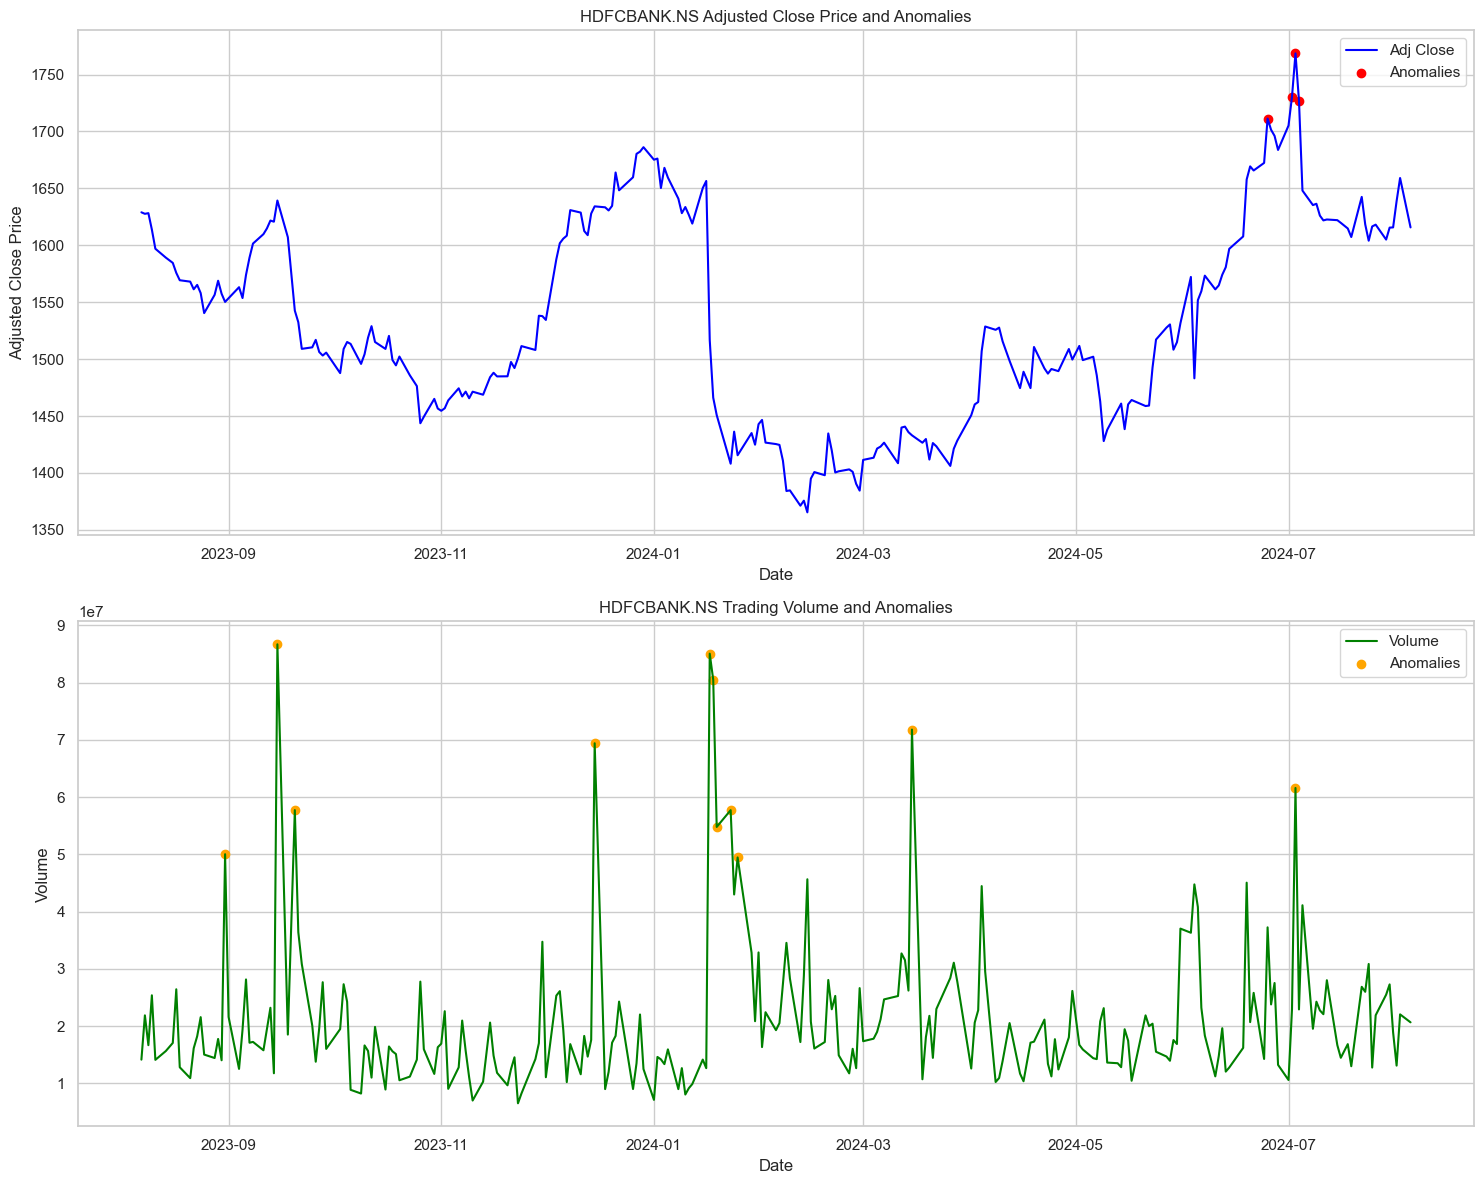

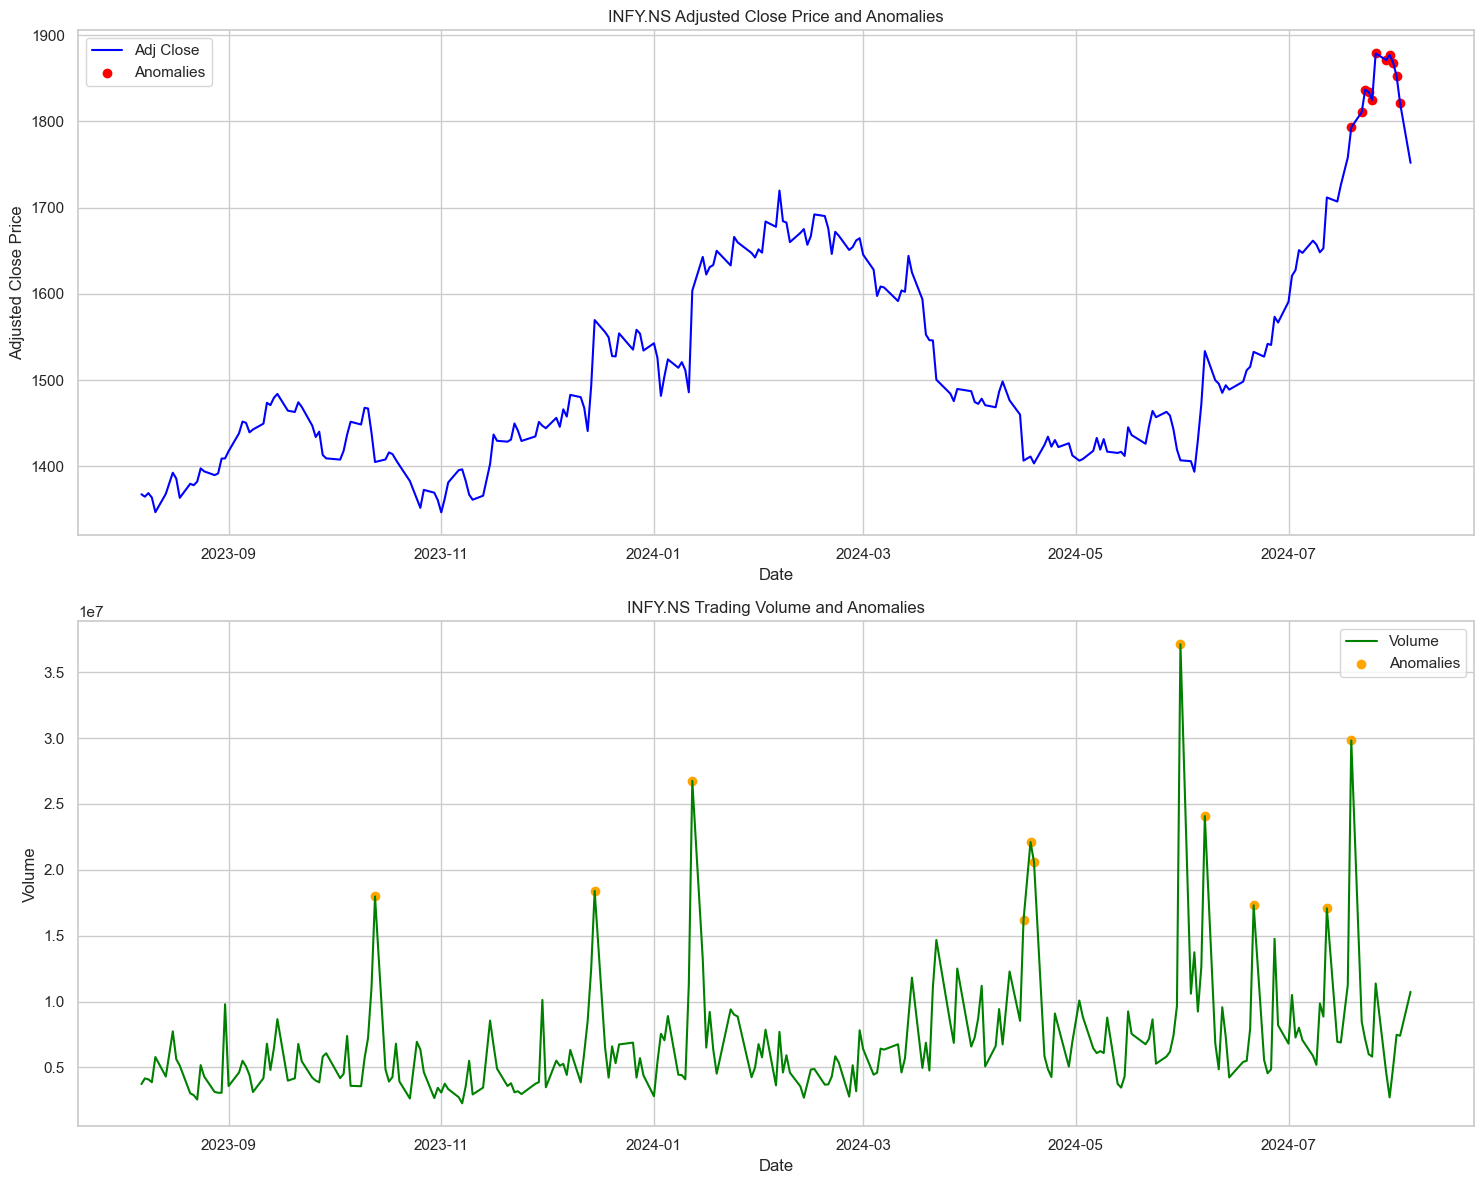

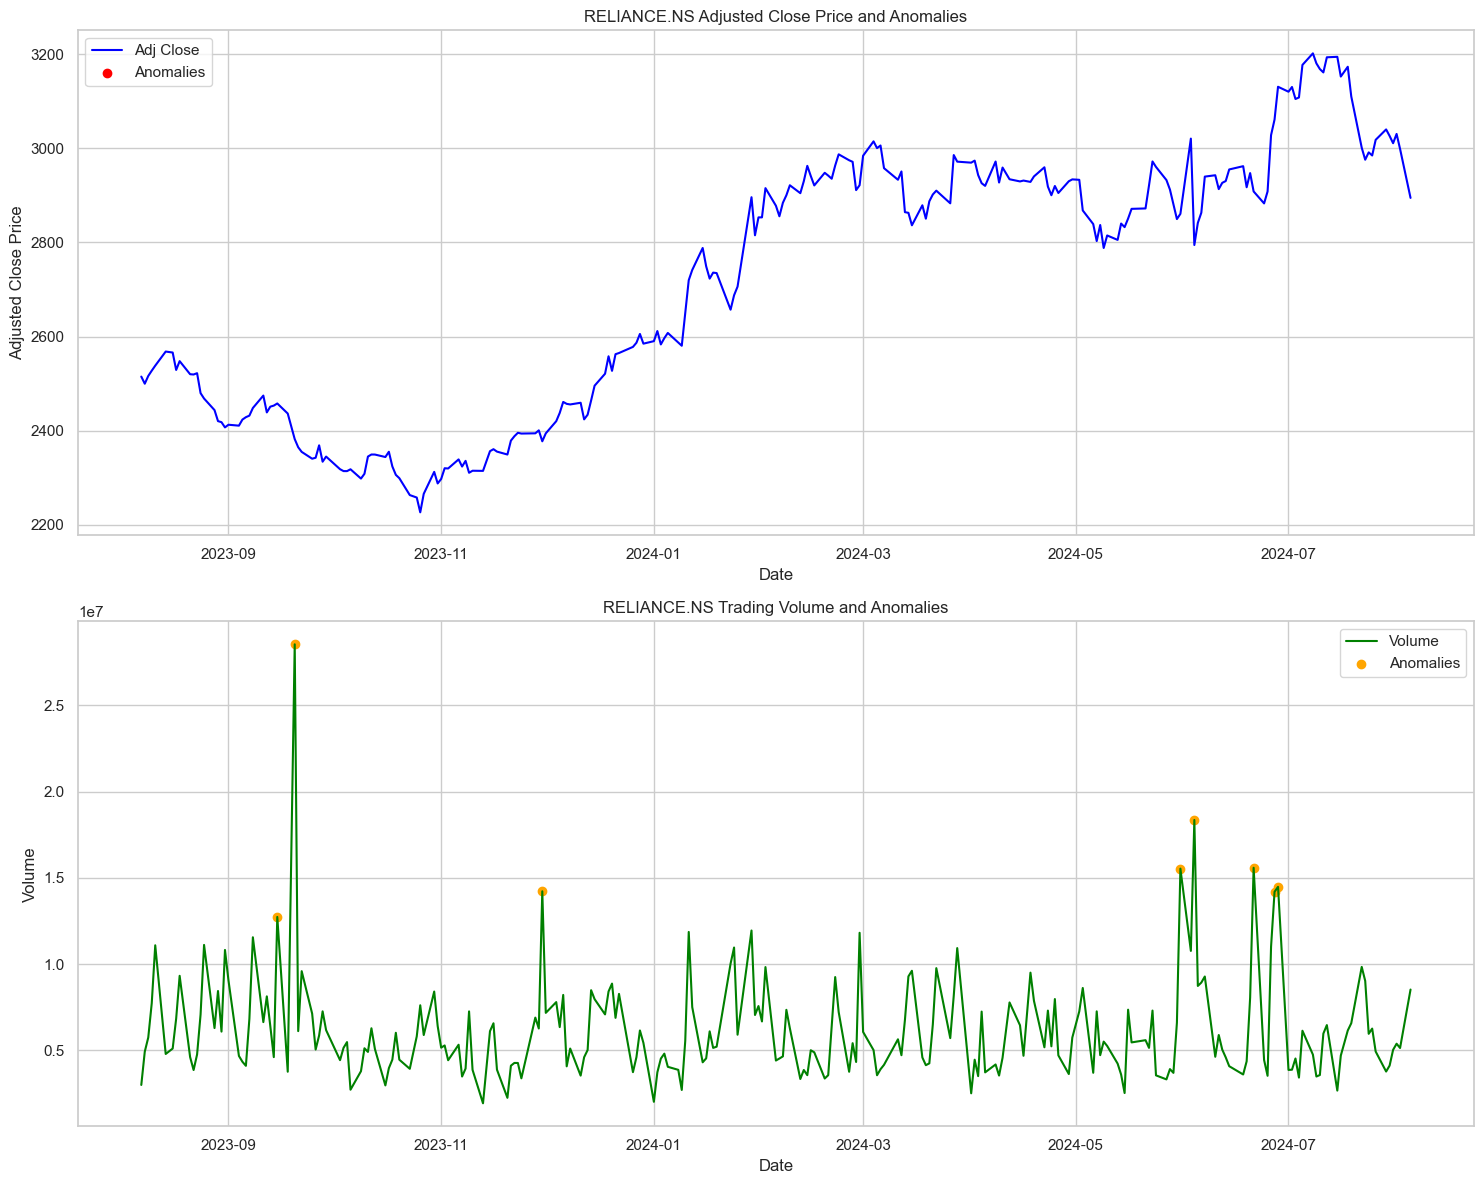

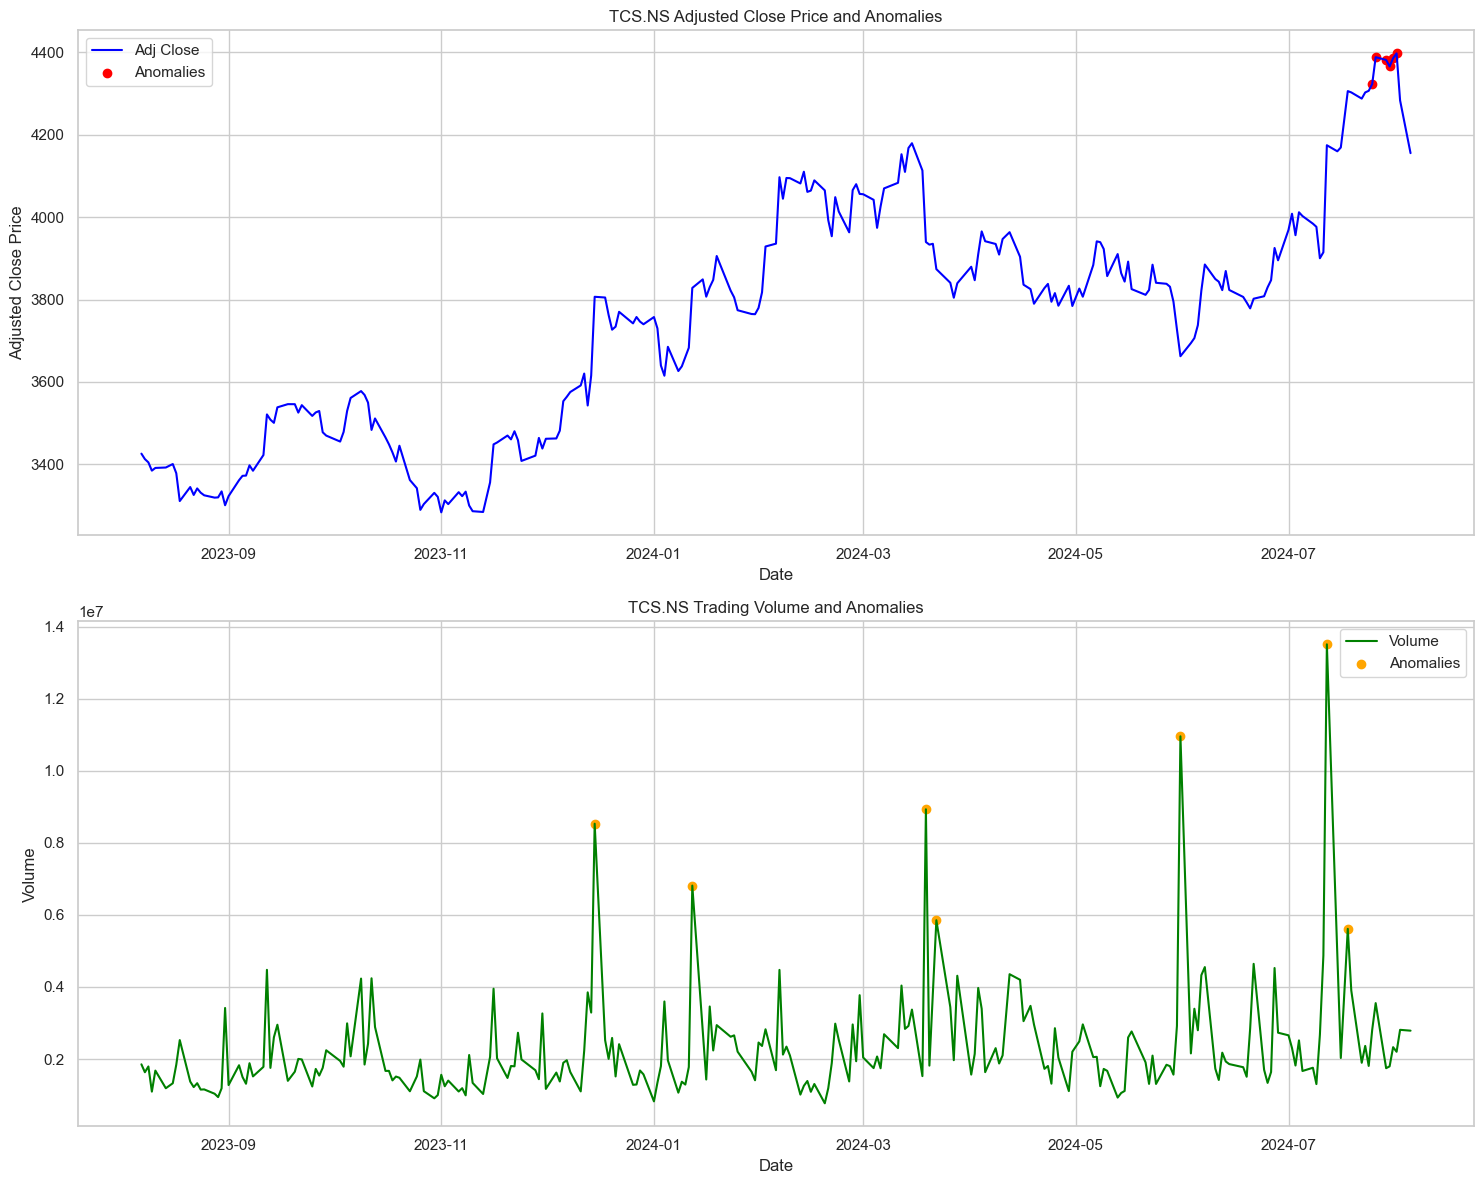

In [15]:
def plot_anomalies(ticker, anomalies_adj_close, anomalies_volume):
    # Filter the main and anomalies data for the given ticker
    data_ticker = stock_data[stock_data['Ticker'] == ticker]
    adj_close_anomalies = anomalies_adj_close[anomalies_adj_close['Ticker'] == ticker]
    volume_anomalies = anomalies_volume[anomalies_volume['Ticker'] == ticker]

    # plotting
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))

    # adjusted close price
    ax1.plot(data_ticker.index, data_ticker['Adj Close'], label='Adj Close', color='blue')
    ax1.scatter(adj_close_anomalies.index, adj_close_anomalies['Adj Close'], color='red', label='Anomalies')
    ax1.set_title(f'{ticker} Adjusted Close Price and Anomalies')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Adjusted Close Price')
    ax1.legend()

    # volume
    ax2.plot(data_ticker.index, data_ticker['Volume'], label='Volume', color='green')
    ax2.scatter(volume_anomalies.index, volume_anomalies['Volume'], color='orange', label='Anomalies')
    ax2.set_title(f'{ticker} Trading Volume and Anomalies')
    ax2.set_xlabel('Date')
    ax2.set_ylabel('Volume')
    ax2.legend()

    plt.tight_layout()
    plt.show()

# plot anomalies for each ticker
for ticker in stock_data['Ticker'].unique():
    plot_anomalies(ticker, anomalies_adj_close, anomalies_volume)

The above charts for each company display the adjusted close prices and trading volumes over time, with anomalies highlighted:


- Anomalies are marked in red and represent significant deviations from the typical price range. These could correspond to days with unexpected news, earnings reports, or market shifts.

- Anomalies in trading volume are marked in orange and indicate days with exceptionally high or low trading activity compared to the norm. Such spikes could be due to market events, announcements, or other factors influencing trader behaviour.

analyze the correlation in the anomalies of all the companies:

In [16]:
# consolidate anomalies for adjusted close prices and volumes
all_anomalies_adj_close = anomalies_adj_close[['Ticker']].copy()
all_anomalies_adj_close['Adj Close Anomaly'] = 1  # indicator variable for anomalies

all_anomalies_volume = anomalies_volume[['Ticker']].copy()
all_anomalies_volume['Volume Anomaly'] = 1  # indicator variable for anomalies

# pivot these dataframes to have one row per date and columns for each ticker, filling non-anomalies with 0
adj_close_pivot = all_anomalies_adj_close.pivot_table(index=all_anomalies_adj_close.index, columns='Ticker',
                                                       fill_value=0, aggfunc='sum')

volume_pivot = all_anomalies_volume.pivot_table(index=all_anomalies_volume.index, columns='Ticker',
                                                fill_value=0, aggfunc='sum')

# flatten the multi-level column index
adj_close_pivot.columns = adj_close_pivot.columns.get_level_values(1)
volume_pivot.columns = volume_pivot.columns.get_level_values(1)

# combine the two pivoted dataframes
combined_anomalies = pd.concat([adj_close_pivot, volume_pivot], axis=1, keys=['Adj Close Anomaly', 'Volume Anomaly'])

# calculate the correlation matrix for the anomalies
correlation_matrix = combined_anomalies.corr()

print(correlation_matrix)

                              Adj Close Anomaly                      \
Ticker                              HDFCBANK.NS   INFY.NS    TCS.NS   
                  Ticker                                              
Adj Close Anomaly HDFCBANK.NS          1.000000 -1.000000 -0.492366   
                  INFY.NS             -1.000000  1.000000  0.492366   
                  TCS.NS              -0.492366  0.492366  1.000000   
Volume Anomaly    HDFCBANK.NS          1.000000 -1.000000       NaN   
                  INFY.NS             -1.000000  1.000000       NaN   
                  RELIANCE.NS               NaN       NaN       NaN   
                  TCS.NS                    NaN       NaN       NaN   

                              Volume Anomaly                                  
Ticker                           HDFCBANK.NS   INFY.NS RELIANCE.NS    TCS.NS  
                  Ticker                                                      
Adj Close Anomaly HDFCBANK.NS       1.000000 -1.0000

          Analyzing the Risk of Anomalies          

A stock could be considered more risky if it has frequent and large anomalies in its price or volume. Here’s how we can approach this:

Frequency of Anomalies: A higher number of anomalies may indicate a higher risk.
Magnitude of Anomalies: Larger deviations from the mean (higher absolute Z-scores) suggest higher risk.

In [17]:
# calculate the mean absolute Z-score for each stock as a risk indicator
adj_close_risk = anomalies_adj_close.groupby('Ticker')['Z-score'].apply(lambda x: abs(x).mean())
volume_risk = anomalies_volume.groupby('Ticker')['Z-score'].apply(lambda x: abs(x).mean())

# combine the risk scores from both price and volume anomalies
total_risk = adj_close_risk + volume_risk

# normalize the risk scores to get a relative risk rating from 0 to 1
risk_rating = (total_risk - total_risk.min()) / (total_risk.max() - total_risk.min())

print(risk_rating)

Ticker
HDFCBANK.NS    0.000000
INFY.NS        0.567162
RELIANCE.NS         NaN
TCS.NS         1.000000
Name: Z-score, dtype: float64


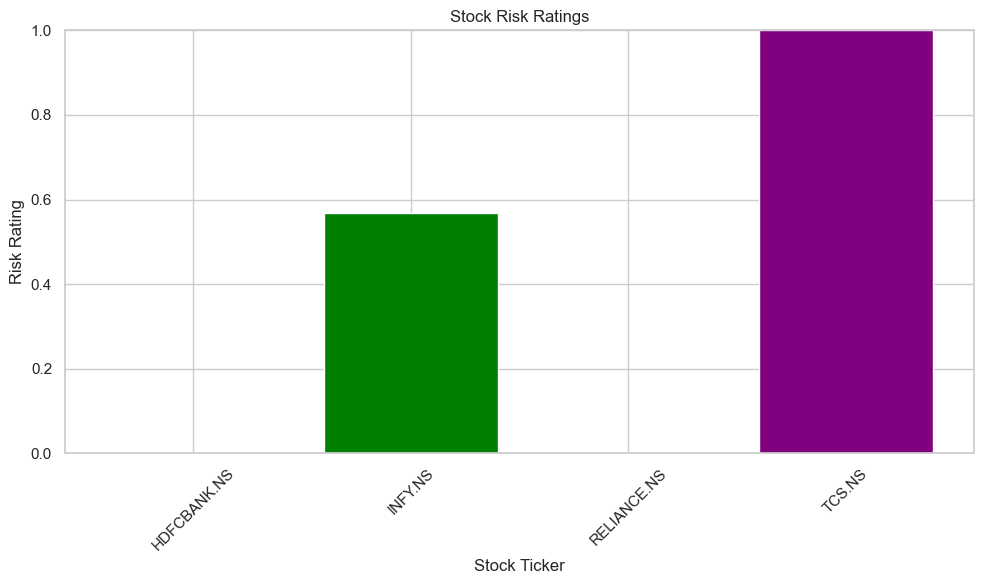

In [19]:
import matplotlib.pyplot as plt

# Define the risk ratings data
risk_rating = {
    'HDFCBANK.NS': 0.000000,
    'INFY.NS': 0.567162,
    'RELIANCE.NS': float('nan'),  # Handle NaN values
    'TCS.NS': 1.000000
}

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(risk_rating.keys(), risk_rating.values(), color=['blue', 'green', 'red', 'purple'])

# Handle NaN values by replacing them with 'N/A' in the label
plt.xlabel('Stock Ticker')
plt.ylabel('Risk Rating')
plt.title('Stock Risk Ratings')
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()



*CONCLUSION*



-INFY : With a risk rating of around 0.06, INFY appears to be less risky compared to TCS. It indicates fewer or less significant anomalies in its trading data.

-HDFCBANK: Shows a risk rating of 0.00, indicating the least risk among the stocks listed. It suggests that HDFCBANK had the fewest and smallest anomalies in its price and volume data.

-TCS: Has the highest risk rating at 1.00. It indicates that TCS is the most risky among these stocks, with the most frequent and largest anomalies detected.

-RELIANCE: The NaN value suggests that it did not have detectable anomalies in the period analyzed.

 *So, this is how you can detect, analyze, and interpret the anomalies in the stock market. Anomalies in the stock market are important because they can indicate opportunities or risks. For example, a sudden spike in a stock’s price could be due to positive news about the company or its industry, which signals a potential investment opportunity. Conversely, an unexpected price drop could warn of underlying issues or market sentiment changes, which signals a risk that investors may need to manage.*